In [34]:
from bs4 import BeautifulSoup
from selenium import webdriver
from time import sleep

browser = webdriver.Chrome()

# Get 200 french names
french_names = []
browser.get("http://www.studentsoftheworld.info/penpals/stats_fr.php?Pays=FRA")
# TODO clean text
french_names.extend([e.text for e in browser.find_elements_by_css_selector('td[bgcolor="#FAFAFF"]')])
sleep(1)
print(french_names)

['Marie', 'Thomas', 'Léa', 'Nicolas', 'Camille', 'maxime', 'Manon', 'Quentin', 'chloé', 'Alexandre', 'Julie', 'julien', 'Sarah', 'Antoine', 'Laura', 'kevin', 'Pauline', 'Clément', 'Mathilde', 'Lucas', 'marine', 'romain', 'Emma', 'pierre', 'Lucie', 'Florian', 'Anaïs', 'Valentin', 'Marion', 'guillaume', 'océane', 'Hugo', 'Justine', 'Théo', 'Clara', 'anthony', 'Morgane', 'Jeremy', 'Lisa', 'alexis', 'Charlotte', 'Paul', 'Juliette', 'Adrien', 'émilie', 'benjamin', 'Melanie', 'Mathieu', 'Inès', 'vincent', 'elodie', 'Arthur', 'Louise', 'Alex', 'Claire', 'Louis', 'Amandine', 'baptiste', 'Margaux', 'Dylan', 'Noémie', 'Nathan', 'Alice', 'Corentin', 'Audrey', 'léo', 'Clémence', 'Axel', 'Maëva', 'Thibault', 'Eva', 'Simon', 'Mélissa', 'Jordan', 'Amélie', 'Matthieu', 'Caroline', 'enzo', 'celia', 'Rémi', 'Elise', 'tom', 'Celine', 'Aurélien', 'Margot', 'Victor', 'elisa', 'loic', 'Jade', 'Sébastien', 'fanny', 'Raphaël', 'Sophie', 'David', 'Romane', 'Arnaud', 'Aurélie', 'Damien', 'Jeanne', 'Bastien', 'L

In [35]:
# Get 200 japanese names
jap_names = []
browser.get("http://www.studentsoftheworld.info/penpals/stats_fr.php?Pays=JAP")
# TODO clean text
jap_names.extend([e.text for e in browser.find_elements_by_css_selector('td[bgcolor="#FAFAFF"]')])
sleep(1)
print(jap_names)


['Yuka', 'yuki', 'Kana', 'shun', 'yuri', 'Hiroki', 'Yuki', 'keita', 'Haruka', 'ren', 'saki', 'takumi', 'Yui', 'Naoki', 'shiori', 'KAZU', 'Rina', 'hiro', 'kaori', 'kazuki', 'Ayaka', 'Takuya', 'ayumi', 'shota', 'Miho', 'Ken', 'Chihiro', 'shinji', 'Natsumi', 'kouki', 'Mayu', 'MASA', 'minami', 'taka', 'aya', 'yuuki', 'risa', 'Yuta', 'sayaka', 'Yuma', 'Mai', 'tatsuya', 'Kanako', 'Kyohei', 'Moe', 'naoya', 'Miyu', 'Ryota', 'Mina', 'yusuke', 'Ayano', 'Kaito', 'Erika', 'Daiki', 'Mio', 'Kazuya', 'nana', 'Akira', 'Airi', 'Tom', 'Miki', 'Kento', 'yuna', 'Yu', 'Marina', 'Ryo', 'Yumi', 'yuto', 'Mari', 'Issei', 'rin', 'Daisuke', 'Anna', 'You', 'Mao', 'hikaru', 'Akari', 'Ryosuke', 'Mika', 'sho', 'mei', 'Kei', 'Aika', 'MAKOTO', 'eri', 'masaki', 'nao', 'shuto', 'Shiho', 'Brad', 'Ai', 'atsushi', 'asuka', 'kazuma', 'Aki', 'Toshi', 'Haruna', 'TAIYO', 'misaki', 'Nanami', 'Natsuki', 'Gaku', 'Narumi', 'shinya', 'aoi', 'Naoto', 'Saya', 'Evan', 'fuka', 'yoshiki', 'Sakura', 'taro', 'Rika', 'kenta', 'mami', 'wata

In [14]:
import numpy as np

# Transform to vector
def to_vector(name):
    return np.array([ord(l) for l in name.lower()])
    
french_names_vectors = [to_vector(name) for name in french_names]
jap_names_vectors = [to_vector(name) for name in jap_names]

In [36]:
PADDING_NUMBER = 0
VECTOR_SIZE = 5
# Transform to vector
def to_formatted_vector(name):
    vector = [ord(l) for l in name.lower()]
    return np.array(vector[:VECTOR_SIZE]) if len(vector) >= VECTOR_SIZE else np.array(vector + [PADDING_NUMBER]*(VECTOR_SIZE-len(vector)))
    
french_names_vectors = np.array([to_formatted_vector(name) for name in french_names])
jap_names_vectors = np.array([to_formatted_vector(name) for name in jap_names])

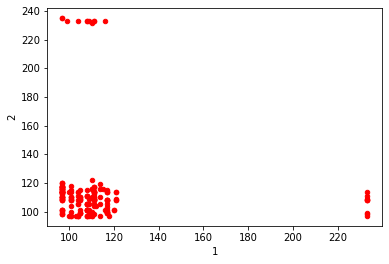

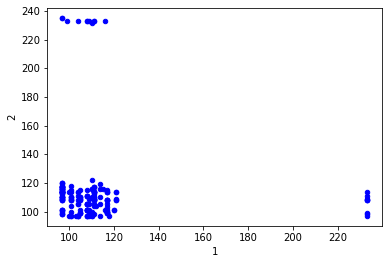

In [20]:
import pandas as pd

df_french = pd.DataFrame(french_names_vectors)
df_jap = pd.DataFrame(jap_names_vectors)

df_french.plot.scatter(1,2, color="r")
df_french.plot.scatter(1,2, color="b")


In [45]:
from sklearn.svm import SVC

HALF_TRAINING_SET_SIZE = 120
train_samples = np.concatenate((french_names_vectors[:HALF_TRAINING_SET_SIZE], jap_names_vectors[:HALF_TRAINING_SET_SIZE]))
train_targets = np.array([0]*HALF_TRAINING_SET_SIZE + [1]*HALF_TRAINING_SET_SIZE)

test_samples = np.concatenate((french_names_vectors[HALF_TRAINING_SET_SIZE:], jap_names_vectors[HALF_TRAINING_SET_SIZE:]))
test_targets = np.array([0]*(test_samples.shape[0] // 2) + [1]*(test_samples.shape[0] // 2))

cls = SVC()
cls.fit(train_samples, train_targets)


C:\Users\miguel\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [46]:
cls.score(test_samples, test_targets)

0.55